<a href="https://colab.research.google.com/github/d33disc/Bot-Generator-Bot/blob/main/examples/Anomaly_detection_with_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2024 Google LLC.

In [1]:
# @title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Anomaly detection with embeddings

In [54]:
import numpy as np
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits

# Load example data (digits dataset)
digits = load_digits()
X = digits.data
y = digits.target

# Initialize t-SNE with specified parameters
tsne = TSNE(
    n_components=2,  # Number of components (dimensions) to reduce to
    perplexity=30.0,  # Controls the local neighborhood size
    early_exaggeration=12.0,  # Controls the initial spread of points
    learning_rate="auto",  # Automatically determine the learning rate
    n_iter=1000,  # Maximum number of iterations
    n_iter_without_progress=300,  # Stop early if no progress is made
    min_grad_norm=1e-7,  # Minimum gradient norm for convergence
    metric="euclidean",  # Distance metric to use
    init="random",  # Initialization method
    verbose=0,  # Verbosity level
    random_state=42,  # Random seed for reproducibility
    method="barnes_hut",  # Algorithm to use (Barnes-Hut is faster)
    angle=0.5,  # Speed/accuracy trade-off for Barnes-Hut
    n_jobs=None,  # Number of parallel jobs to run
    square_distances="legacy",
)  # How to compute squared distances

# Apply t-SNE to the data
X_embedded = tsne.fit_transform(X)

# Access the embedding and other attributes
embedding = tsne.embedding_  # The low-dimensional embedding
kl_divergence = tsne.kl_divergence_  # The final KL divergence
n_iter_ = tsne.n_iter_  # The number of iterations run

# Visualize the results (optional)
import matplotlib.pyplot as plt

plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y)
plt.title("t-SNE Embedding of Digits Dataset")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.colorbar()
plt.show()

TypeError: TSNE.__init__() got an unexpected keyword argument 'square_distances'

In [55]:
import numpy as np
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits

In [56]:
# Load example data (digits dataset)
digits = load_digits()
X = digits.data
y = digits.target

In [57]:
# Initialize t-SNE with specified parameters
tsne = TSNE(
    n_components=2,  # Number of components (dimensions) to reduce to
    perplexity=30.0,  # Controls the local neighborhood size
    # ... (other parameters) ...
)

# Apply t-SNE to the data
X_embedded = tsne.fit_transform(X)

In [58]:
# Access the embedding and other attributes
embedding = tsne.embedding_  # The low-dimensional embedding
kl_divergence = tsne.kl_divergence_  # The final KL divergence
n_iter_ = tsne.n_iter_  # The number of iterations run

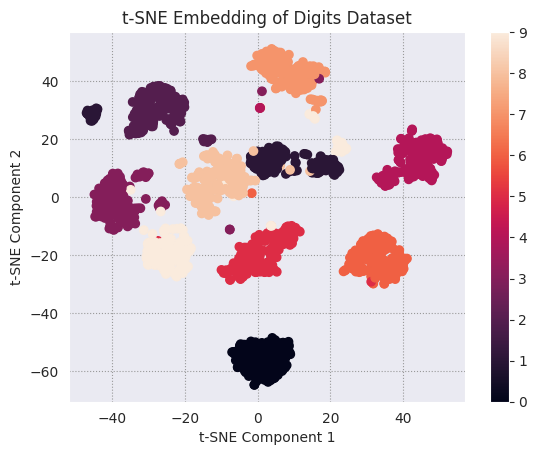

In [59]:
# Visualize the results (optional)
import matplotlib.pyplot as plt

plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y)
plt.title("t-SNE Embedding of Digits Dataset")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.colorbar()
plt.show()

<a target="_blank" href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Anomaly_detection_with_embeddings.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" height=30/>

## Overview

This tutorial demonstrates how to use the embeddings from the Gemini API to detect potential outliers in your dataset. You will visualize a subset of the 20 Newsgroup dataset using [t-SNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) and detect outliers outside a particular radius of the central point of each categorical cluster.


In [2]:
%pip install -U -q "google-genai>=1.0.0"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.7/145.7 kB 4.5 MB/s eta 0:00:00


To run the following cell, your API key must be stored it in a Colab Secret named `GOOGLE_API_KEY`. If you don't already have an API key, or you're not sure how to create a Colab Secret, see the [Authentication](https://github.com/google-gemini/cookbook/blob/main/quickstarts/Authentication.ipynb) quickstart for an example.

In [3]:
# Used to securely store your API key
from google.colab import userdata
from google import genai
API_KEY = userdata.get("GOOGLE_API_KEY")
client = genai.Client(api_key=API_KEY)

## Prepare dataset

The [20 Newsgroups Text Dataset](https://scikit-learn.org/stable/datasets/real_world.html#newsgroups-dataset) from the open-source [SciKit project](https://scikit-learn.org/) contains 18,000 newsgroups posts on 20 topics divided into training and test sets. The split between the training and test datasets are based on messages posted before and after a specific date. This tutorial uses the training subset.

In [25]:
#!/usr/bin/env python

# Convert rainbow "--print-matrix=sin" output to Matlab sparse matrix
# format.  Rainbow frequency file expected on stdin. Two arguments to
# script: (1) regex to match lines of standard input, and (2) string
# to use as root for output file names.  Lines that don't match are
# ignored.  Output is two files, with suffixes '.data' and '.label'

# Examples: rainbow2matlab 20news-bydate-train train
#           rainbow2matlab 20news-bydate-test test

import sys
import re

assert(len(sys.argv) == 3)
regex = sys.argv[1]
rootName = sys.argv[2]
labels = {}
fd = open('%s.data' % rootName,'w')
fl = open('%s.label' % rootName,'w')
assert(fd and fl)
i = 0
for line in sys.stdin:
    a = line.split(None,2)
    # skip empty files
    if len(a) < 3: continue
    if not re.search(regex,a[0]): continue
    l = a[1]
    if not l in labels:
        labels[l] = len(labels)
    li = labels[l]
    b = a[2].strip().split('  ')
    # skip files with only one word
    if len(b) <= 1: continue
    i = i + 1
    def printEntry(s):
        j,cnt = map(int,s.split())
        fd.write('%d %d %d\n' % (i,j+1,cnt))
    map(printEntry,b)
    fl.write('%d\n' % (li+1))
#!/usr/bin/env python

# Convert rainbow "--print-matrix=sin" output to Matlab sparse matrix
# format.  Rainbow frequency file expected on stdin. Two arguments to
# script: (1) regex to match lines of standard input, and (2) string
# to use as root for output file names.  Lines that don't match are
# ignored.  Output is two files, with suffixes '.data' and '.label'

# Examples: rainbow2matlab 20news-bydate-train train
#           rainbow2matlab 20news-bydate-test test

import sys
import re

assert(len(sys.argv) == 3)
regex = sys.argv[1]
rootName = sys.argv[2]
labels = {}
fd = open('%s.data' % rootName,'w')
fl = open('%s.label' % rootName,'w')
assert(fd and fl)
i = 0
for line in sys.stdin:
    a = line.split(None,2)
    # skip empty files
    if len(a) < 3: continue
    if not re.search(regex,a[0]): continue
    l = a[1]
    if not l in labels:
        labels[l] = len(labels)
    li = labels[l]
    b = a[2].strip().split('  ')
    # skip files with only one word
    if len(b) <= 1: continue
    i = i + 1
    def printEntry(s):
        j,cnt = map(int,s.split())
        fd.write('%d %d %d\n' % (i,j+1,cnt))
    map(printEntry,b)
    fl.write('%d\n' % (li+1))
#!/usr/bin/env python

# Convert rainbow "--print-matrix=sin" output to Matlab sparse matrix
# format.  Rainbow frequency file expected on stdin. Two arguments to
# script: (1) regex to match lines of standard input, and (2) string
# to use as root for output file names.  Lines that don't match are
# ignored.  Output is two files, with suffixes '.data' and '.label'

# Examples: rainbow2matlab 20news-bydate-train train
#           rainbow2matlab 20news-bydate-test test

import sys
import re

assert(len(sys.argv) == 3)
regex = sys.argv[1]
rootName = sys.argv[2]
labels = {}
fd = open('%s.data' % rootName,'w')
fl = open('%s.label' % rootName,'w')
assert(fd and fl)
i = 0
for line in sys.stdin:
    a = line.split(None,2)
    # skip empty files
    if len(a) < 3: continue
    if not re.search(regex,a[0]): continue
    l = a[1]
    if not l in labels:
        labels[l] = len(labels)
    li = labels[l]
    b = a[2].strip().split('  ')
    # skip files with only one word
    if len(b) <= 1: continue
    i = i + 1
    def printEntry(s):
        j,cnt = map(int,s.split())
        fd.write('%d %d %d\n' % (i,j+1,cnt))
    map(printEntry,b)
    fl.write('%d\n' % (li+1))
#!/usr/bin/env python

# Convert rainbow "--print-matrix=sin" output to Matlab sparse matrix
# format.  Rainbow frequency file expected on stdin. Two arguments to
# script: (1) regex to match lines of standard input, and (2) string
# to use as root for output file names.  Lines that don't match are
# ignored.  Output is two files, with suffixes '.data' and '.label'

# Examples: rainbow2matlab 20news-bydate-train train
#           rainbow2matlab 20news-bydate-test test

import sys
import re

assert(len(sys.argv) == 3)
regex = sys.argv[1]
rootName = sys.argv[2]
labels = {}
fd = open('%s.data' % rootName,'w')
fl = open('%s.label' % rootName,'w')
assert(fd and fl)
i = 0
for line in sys.stdin:
    a = line.split(None,2)
    # skip empty files
    if len(a) < 3: continue
    if not re.search(regex,a[0]): continue
    l = a[1]
    if not l in labels:
        labels[l] = len(labels)
    li = labels[l]
    b = a[2].strip().split('  ')
    # skip files with only one word
    if len(b) <= 1: continue
    i = i + 1
    def printEntry(s):
        j,cnt = map(int,s.split())
        fd.write('%d %d %d\n' % (i,j+1,cnt))
    list(map(printEntry,b)) # added list conversion here
    fl.write('%d\n' % (li+1))
fd.close()
fl.close()
print('%s: %d lines processed' % (sys.argv[0],i))
print('%s: %d unique labels' % (sys.argv[0],len(labels)))
def srtfun(a,b):
    if labels[a] < labels[b]: return -1
    elif labels[a] > labels[b]: return 1
    else: return 0
fm = open('%s.map' % rootName,'w')
keys = list(labels.keys()) # added list conversion here
keys.sort(srtfun)
for k in keys:
    fm.write('%s %d\n' % (k,labels[k]+1))
fm.close()
    if labels[a] < labels[b]: return -1
    elif labels[a] > labels[b]: return 1
    else: return 0
fm = open('%s.map' % rootName,'w')
keys = list(labels.keys())
keys.sort(srtfun)
for k in keys:
    fm.write('%s %d\n' % (k,labels[k]+1))
fm.close()
    if labels[a] < labels[b]: return -1
    elif labels[a] > labels[b]: return 1
    else: return 0
fm = open('%s.map' % rootName,'w')
keys = list(labels.keys()) # added list conversion here
keys.sort(srtfun)
for k in keys:
    fm.write('%s %d\n' % (k,labels[k]+1))
fm.close()
    if labels[a] < labels[b]: return -1
    elif labels[a] > labels[b]: return 1
    else: return 0
fm = open('%s.map' % rootName,'w')
keys = labels.keys()
keys.sort(srtfun)
for k in keys:
    fm.write('%s %d\n' % (k,labels[k]+1))
fm.close()

IndentationError: unexpected indent (<ipython-input-25-b5a61fa6b74d>, line 175)

In [26]:
import sys
   import re

   assert(len(sys.argv) == 3)
   regex = sys.argv[1]
   rootName = sys.argv[2]
   labels = {}
   fd = open('%s.data' % rootName,'w')
   fl = open('%s.label' % rootName,'w')
   assert(fd and fl)
   i = 0

IndentationError: unexpected indent (<ipython-input-26-103bbbcc3014>, line 2)

In [27]:
import sys
import re # Removed extra spaces before this line

assert(len(sys.argv) == 3)
regex = sys.argv[1]
rootName = sys.argv[2]
labels = {}
fd = open('%s.data' % rootName,'w')
fl = open('%s.label' % rootName,'w')
assert(fd and fl)
i = 0

In [28]:
#!/usr/bin/env python

# Convert rainbow "--print-matrix=sin" output to Matlab sparse matrix
# format.  Rainbow frequency file expected on stdin. Two arguments to
# script: (1) regex to match lines of standard input, and (2) string
# to use as root for output file names.  Lines that don't match are
# ignored.  Output is two files, with suffixes '.data' and '.label'

# Examples: rainbow2matlab 20news-bydate-train train
#           rainbow2matlab 20news-bydate-test test

import sys
import re

assert(len(sys.argv) == 3)
regex = sys.argv[1]
rootName = sys.argv[2]
labels = {}
fd = open('%s.data' % rootName,'w')
fl = open('%s.label' % rootName,'w')
assert(fd and fl)
i = 0
for line in sys.stdin:
    a = line.split(None,2)
    # skip empty files
    if len(a) < 3: continue
    if not re.search(regex,a[0]): continue
    l = a[1]
    if not l in labels:
        labels[l] = len(labels)
    li = labels[l]
    b = a[2].strip().split('  ')
    # skip files with only one word
    if len(b) <= 1: continue
    i = i + 1
    def printEntry(s):
        j,cnt = map(int,s.split())
        fd.write('%d %d %d\n' % (i,j+1,cnt))
    list(map(printEntry,b

SyntaxError: incomplete input (<ipython-input-28-99149309a557>, line 39)

In [29]:
#!/usr/bin/env python

# Convert rainbow "--print-matrix=sin" output to Matlab sparse matrix
# ... (comments omitted for brevity) ...

import sys
import re

assert(len(sys.argv) == 3)
regex = sys.argv[1]
rootName = sys.argv[2]
labels = {}
fd = open('%s.data' % rootName,'w')
fl = open('%s.label' % rootName,'w')
assert(fd and fl)
i = 0

In [31]:
for line in sys.stdin:
    a = line.split(None,2)
    # skip empty files
    if len(a) < 3: continue
    if not re.search(regex,a[0]): continue
    l = a[1]
    if not l in labels:
        labels[l] = len(labels)
    li = labels[l]
    b = a[2].strip().split('  ')
    # skip files with only one word
    if len(b) <= 1: continue
    i = i + 1
    def printEntry(s):
for line in sys.stdin:
    a = line.split(None,2)
    # skip empty files
    if len(a) < 3: continue
    if not re.search(regex,a[0]): continue
    l = a[1]
    if not l in labels:
        labels[l] = len(labels)
    li = labels[l]
    b = a[2].strip().split('  ')
    # skip files with only one word
    if len(b) <= 1: continue
    i = i + 1
    def printEntry(s):
        j,cnt = map(int,s.split())
        fd.write('%d %d %d\n' % (i,j+1,cnt))
    list(map(printEntry,b))

IndentationError: expected an indented block after function definition on line 14 (<ipython-input-31-816f153a68d8>, line 15)

In [32]:
for line in sys.stdin:
    a = line.split(None,2)
    # skip empty files
    if len(a) < 3: continue
    if not re.search(regex,a[0]): continue
    l = a[1]
    if not l in labels:
        labels[l] = len(labels)
    li = labels[l]
    b = a[2].strip().split('  ')
    # skip files with only one word
    if len(b) <= 1: continue
    i = i + 1
    def printEntry(s):
        j,cnt = map(int,s.split())
        fd.write('%d %d %d\n' % (i,j+1,cnt)) # Indented this line
    list(map(printEntry,b))

In [36]:
#!/usr/bin/env python

# Convert rainbow "--print-matrix=sin" output to Matlab sparse matrix
# format.  Rainbow frequency file expected on stdin. Two arguments to
# script: (1) regex to match lines of standard input, and (2) string
# to use as root for output file names.  Lines that don't match are
# ignored.  Output is two files, with suffixes '.data' and '.label'

# Examples: rainbow2matlab 20news-bydate-train train
#           rainbow2matlab 20news-bydate-test test

import sys
import re

assert(len(sys.argv) == 3)
regex = sys.argv[1]
rootName = sys.argv[2]
labels = {}
fd = open('%s.data' % rootName,'w')
fl = open('%s.label' % rootName,'w')
assert(fd and fl)
i = 0
for line in sys.stdin:
    a = line.split(None,2)
    # skip empty files
    if len(a) < 3: continue
    if not re.search(regex,a[0]): continue
    l = a[1]
    if not l in labels:
        labels[l] = len(labels)
    li = labels[l]
    b = a[2].strip().split('  ')
    # skip files with only one word
    if len(b) <= 1: continue
    i = i + 1
    def printEntry(s):
        j,cnt = map(int,s.split())
        fd.write('%d %d %d\n' % (i,j+1,cnt))
    list(map(printEntry,b)) # added list conversion here
    fl.write('%d\n' % (li+1))
fd.close()
fl.close()
print('%s: %d lines processed' % (sys.argv[0],i))
print('%s: %d unique labels' % (sys.argv[0],len(labels)))
def srtfun(a,b):
    if labels[a] < labels[b]: return -1
    elif labels[a] > labels[b]: return 1
    else: return 0
fm = open('%s.map' % rootName,'w')
keys = list(labels.keys()) # added list conversion here
keys.sort(key=lambda x: labels[x]) # changed to use a lambda for sorting
for k in keys:
    fm.write('%s %d\n' % (k,labels[k]+1))
fm.close()

/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py: 0 lines processed
/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py: 0 unique labels


In [5]:
from sklearn.datasets import fetch_20newsgroups

newsgroups_train = fetch_20newsgroups(subset="train")

# View list of class names for dataset
newsgroups_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

Here is the first example in the training set.

In [37]:
idx = newsgroups_train.data[0].index("Lines")
print(newsgroups_train.data[0][idx:])

Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [14]:
import re

# Apply functions to remove names, emails, and extraneous words from data points in newsgroups.data
newsgroups_train.data = [
    re.sub(r"[\w\.-]+@[\w\.-]+", "", d) for d in newsgroups_train.data
]  # Remove email
newsgroups_train.data = [
    re.sub(r"\([^()]*\)", "", d) for d in newsgroups_train.data
]  # Remove names
newsgroups_train.data = [
    d.replace("From: ", "") for d in newsgroups_train.data
]  # Remove "From: "
newsgroups_train.data = [
    d.replace("\nSubject: ", "") for d in newsgroups_train.data
]  # Remove "\nSubject: "

# Cut off each text entry after 5,000 characters
newsgroups_train.data = [
    d[0:5000] if len(d) > 5000 else d for d in newsgroups_train.data
]

In [15]:
import pandas as pd

# Put training points into a dataframe
df_train = pd.DataFrame(newsgroups_train.data, columns=["Text"])
df_train["Label"] = newsgroups_train.target
# Match label to target name index
df_train["Class Name"] = df_train["Label"].map(
    newsgroups_train.target_names.__getitem__
)

df_train

,Text,Label,Class Name
0,WHAT car is this!?\nNntp-Posting-Host: rac3.w...,7,rec.autos
1,SI Clock Poll - Final Call\nSummary: Final ca...,4,comp.sys.mac.hardware
2,PB questions...\nOrganization: Purdue Univers...,4,comp.sys.mac.hardware
3,Re: Weitek P9000 ?\nOrganization: Harris Comp...,1,comp.graphics
4,Re: Shuttle Launch Question\nOrganization: Sm...,14,sci.space
...,...,...,...
11309,Re: Migraines and scans\nDistribution: world...,13,sci.med
11310,Screen Death: Mac Plus/512\nLines: 22\nOrganiz...,4,comp.sys.mac.hardware
11311,Mounting CPU Cooler in vertical case\nOrganiz...,3,comp.sys.ibm.pc.hardware
11312,Re: Sphere from 4 points?\nOrganization: Cent...,1,comp.graphics


Next, sample some of the data by taking 150 data points in the training dataset and choosing a few categories. This tutorial uses the science categories.

In [ ]:
# Take a sample of each label category from df_train
SAMPLE_SIZE = 150
df_train = (
    df_train.groupby("Label", as_index=False)
    .apply(lambda x: x.sample(SAMPLE_SIZE))
    .reset_index(drop=True)
)

# Choose categories about science
df_train = df_train[df_train["Class Name"].str.contains("sci")]

# Reset the index
df_train = df_train.reset_index()
df_train

In [17]:
df_train["Class Name"].value_counts()

,count
Class Name,
sci.crypt,150
sci.electronics,150
sci.med,150
sci.space,150


## Create the embeddings

In this section, you will see how to generate embeddings for the different texts in the dataframe using the embeddings from the Gemini API.

### API changes to Embeddings with model embedding-001

For the embeddings model, `text-embedding-004`, there is a task type parameter and the optional title (only valid with task_type=`RETRIEVAL_DOCUMENT`).

These parameters apply only to the embeddings models. The task types are:

Task Type | Description
---       | ---
RETRIEVAL_QUERY	| Specifies the given text is a query in a search/retrieval setting.
RETRIEVAL_DOCUMENT | Specifies the given text is a document in a search/retrieval setting.
SEMANTIC_SIMILARITY	| Specifies the given text will be used for Semantic Textual Similarity (STS).
CLASSIFICATION	| Specifies that the embeddings will be used for classification.
CLUSTERING	| Specifies that the embeddings will be used for clustering.

In [18]:
from tqdm.auto import tqdm
from google.genai import types

tqdm.pandas()

from google.api_core import retry
import numpy as np
import math


def make_embed_text_fn(model):

    @retry.Retry(timeout=300.0)
    def embed_fn(texts: list[str]) -> list[list[float]]:
        # Set the task_type to CLUSTERING and embed the batch of texts
        embeddings = client.models.embed_content(
            model=model,
            contents=texts,
            config=types.EmbedContentConfig(task_type="CLUSTERING"),
        ).embeddings
        return np.array([embedding.values for embedding in embeddings])

    return embed_fn


def create_embeddings(df):
    MODEL_ID = "text-embedding-004" # @param ["embedding-001","text-embedding-004"] {allow-input: true}
    model = f"models/{MODEL_ID}"
    embed_fn = make_embed_text_fn(model)

    batch_size = 100  # at most 100 requests can be in one batch
    all_embeddings = []

    # Loop over the texts in chunks of batch_size
    for i in tqdm(range(0, len(df), batch_size)):
        batch = df["Text"].iloc[i : i + batch_size].tolist()
        embeddings = embed_fn(batch)
        all_embeddings.extend(embeddings)

    df["Embeddings"] = all_embeddings
    return df


df_train = create_embeddings(df_train)
df_train.drop("index", axis=1, inplace=True)

  0%|          | 0/6 [00:00<?, ?it/s]

## Dimensionality reduction

The dimension of the document embedding vector is 768. In order to visualize how the embedded documents are grouped together, you will need to apply dimensionality reduction as you can only visualize the embeddings in 2D or 3D space. Contextually similar documents should be closer together in space as opposed to documents that are not as similar.

In [19]:
len(df_train["Embeddings"][0])

768

In [20]:
# Convert df_train['Embeddings'] Pandas series to a np.array of float32
X = np.array(df_train["Embeddings"].to_list(), dtype=np.float32)
X.shape

(600, 768)

You will apply the t-Distributed Stochastic Neighbor Embedding (t-SNE) approach to perform dimensionality reduction. This technique reduces the number of dimensions, while preserving clusters (points that are close together stay close together). For the original data, the model tries to construct a distribution over which other data points are "neighbors" (e.g., they share a similar meaning). It then optimizes an objective function to keep a similar distribution in the visualization.

In [21]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state=0, max_iter=1000)
tsne_results = tsne.fit_transform(X)

In [22]:
df_tsne = pd.DataFrame(tsne_results, columns=["TSNE1", "TSNE2"])
df_tsne["Class Name"] = df_train[
    "Class Name"
]  # Add labels column from df_train to df_tsne
df_tsne

,TSNE1,TSNE2,Class Name
0,16.570808,17.384001,sci.crypt
1,9.110589,21.416492,sci.crypt
2,9.165236,21.922237,sci.crypt
3,1.035366,12.353320,sci.crypt
4,0.958769,22.580009,sci.crypt
...,...,...,...
595,10.714233,-13.709607,sci.space
596,-4.826165,-13.136059,sci.space
597,8.162663,-10.495029,sci.space
598,41.993263,-16.162052,sci.space


In [23]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df_tsne)

https://docs.google.com/spreadsheets/d/15FF93IiuV1ovmhFUfdn6rzXnReDwIorcJIL6o59F2BI/edit#gid=0


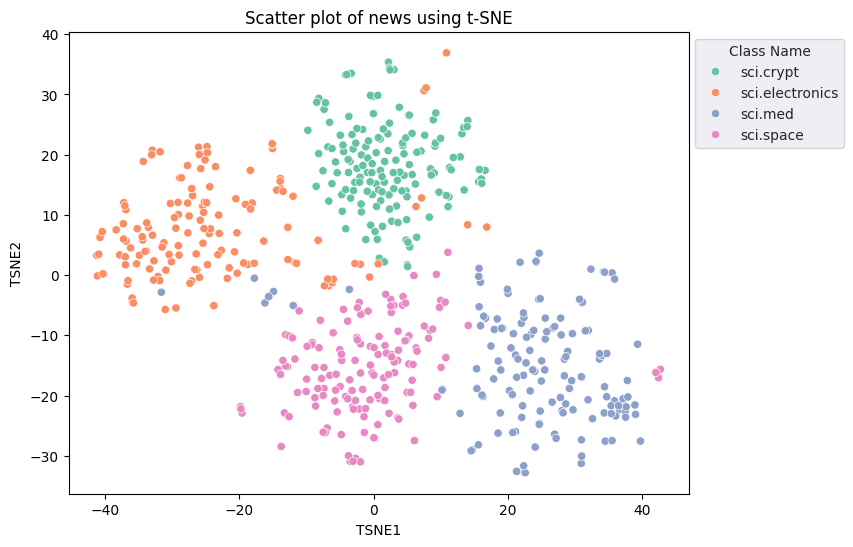

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(8, 6))  # Set figsize
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.scatterplot(data=df_tsne, x="TSNE1", y="TSNE2", hue="Class Name", palette="Set2")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title("Scatter plot of news using t-SNE")
plt.xlabel("TSNE1")
plt.ylabel("TSNE2");

## Outlier detection

To determine which points are anomalous, you will determine which points are inliers and outliers. Start by finding the centroid, or location that represents the center of the cluster, and use the distance to determine the points that are outliers.

Start by getting the centroid of each category.

In [34]:
def get_centroids(df_tsne):
    # Get the centroid of each cluster
    centroids = df_tsne.groupby("Class Name").mean()
    return centroids


centroids = get_centroids(df_tsne)
centroids

,TSNE1,TSNE2
Class Name,,
sci.crypt,1.914866,18.250864
sci.electronics,-23.450031,7.944586
sci.med,23.842878,-15.218448
sci.space,-0.585606,-15.541230


In [35]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=centroids)

https://docs.google.com/spreadsheets/d/1jQX6BOdGphpMZOPyNQs6aeFg59VJUpqWdA8MxPHuIWM/edit#gid=0


In [38]:
def get_embedding_centroids(df):
    emb_centroids = dict()
    grouped = df.groupby("Class Name")
    for c in grouped.groups:
        sub_df = grouped.get_group(c)
        # Get the centroid value of dimension 768
        emb_centroids[c] = np.mean(sub_df["Embeddings"], axis=0)

    return emb_centroids

In [39]:
emb_c = get_embedding_centroids(df_train)

Plot each centroid you have found against the rest of the points.

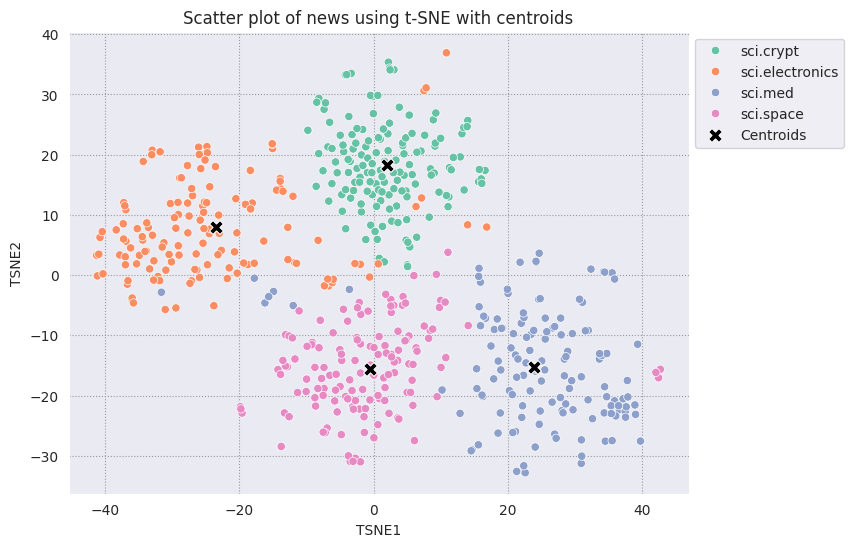

In [40]:
# Plot the centroids against the cluster
fig, ax = plt.subplots(figsize=(8, 6))  # Set figsize
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.scatterplot(data=df_tsne, x="TSNE1", y="TSNE2", hue="Class Name", palette="Set2")
sns.scatterplot(
    data=centroids,
    x="TSNE1",
    y="TSNE2",
    color="black",
    marker="X",
    s=100,
    label="Centroids",
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title("Scatter plot of news using t-SNE with centroids")
plt.xlabel("TSNE1")
plt.ylabel("TSNE2");

Choose a radius. Anything beyond this bound from the centroid of that category is considered an outlier.

In [41]:
def calculate_euclidean_distance(p1, p2):
    return np.sqrt(np.sum(np.square(p1 - p2)))


def detect_outlier(df, emb_centroids, radius):
    for idx, row in df.iterrows():
        class_name = row["Class Name"]  # Get class name of row
        # Compare centroid distances
        dist = calculate_euclidean_distance(
            row["Embeddings"], emb_centroids[class_name]
        )
        df.at[idx, "Outlier"] = dist > radius

    return len(df[df["Outlier"] == True])

In [42]:
range_ = np.arange(0.3, 0.75, 0.02).round(decimals=2).tolist()
num_outliers = []
for i in range_:
    num_outliers.append(detect_outlier(df_train, emb_c, i))

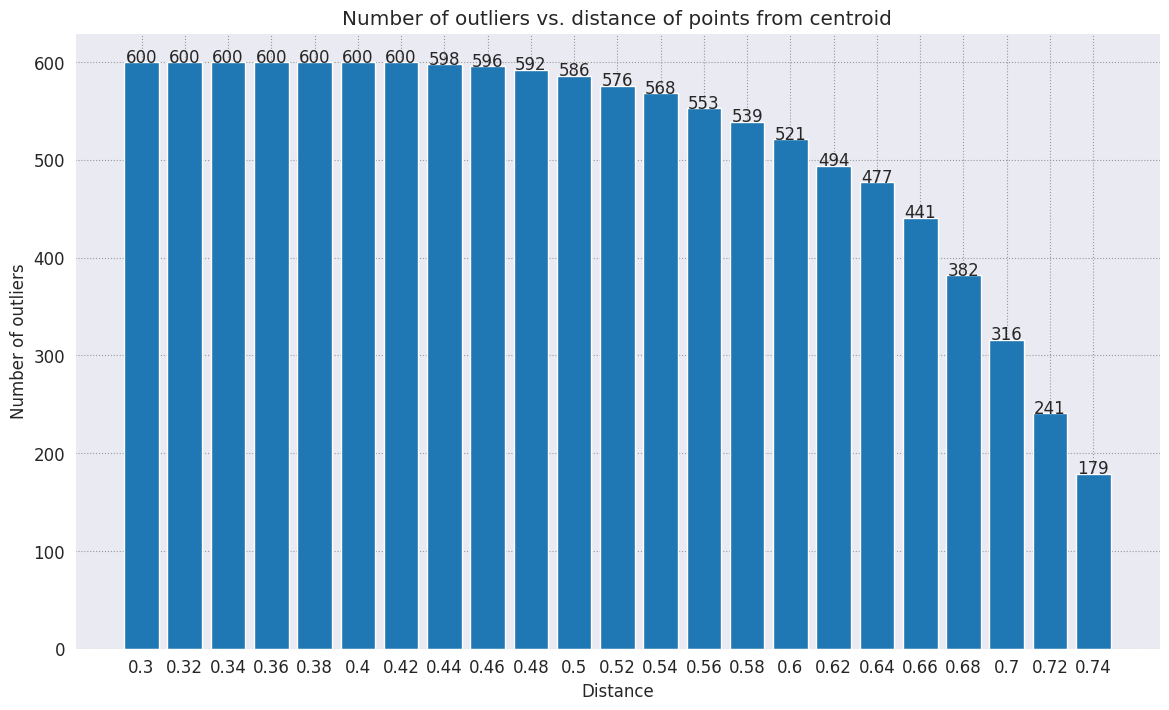

In [43]:
# Plot range_ and num_outliers
fig = plt.figure(figsize=(14, 8))
plt.rcParams.update({"font.size": 12})
plt.bar(list(map(str, range_)), num_outliers)
plt.title("Number of outliers vs. distance of points from centroid")
plt.xlabel("Distance")
plt.ylabel("Number of outliers")
for i in range(len(range_)):
    plt.text(i, num_outliers[i], num_outliers[i], ha="center")

plt.show()

Depending on how sensitive you want your anomaly detector to be, you can choose which radius you would like to use. For now, 0.62 is used, but you can change this value.

In [44]:
# View the points that are outliers
RADIUS = 0.62
detect_outlier(df_train, emb_c, RADIUS)
df_outliers = df_train[df_train["Outlier"] == True]
df_outliers.head()

,Text,Label,Class Name,Embeddings,Outlier
0,Re: The battle is joined\nOrganization: Harve...,11,sci.crypt,"[0.042571474, 0.017429262, -0.041576754, 0.049...",True
2,Licensing...\nOrganization: Yale CS Mail/News ...,11,sci.crypt,"[0.0018054069, 0.029793276, -0.01529835, 0.051...",True
5,Re: The Old Key Registration Idea...\nOrganiz...,11,sci.crypt,"[0.081251346, 0.03088844, -0.020483127, 0.0728...",True
7,Re: Organized Lobbying for Cryptography\nOrga...,11,sci.crypt,"[0.0059181787, 0.015290221, -0.04813505, 0.053...",True
8,Re: Source of random bits on a Unix workstati...,11,sci.crypt,"[-0.03001118, 0.02444099, -0.08313023, 0.00908...",True


<ipython-input-46-3c13d8e00ce9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_outliers, x='Label', y='Class Name', inner='stick', palette='Dark2')


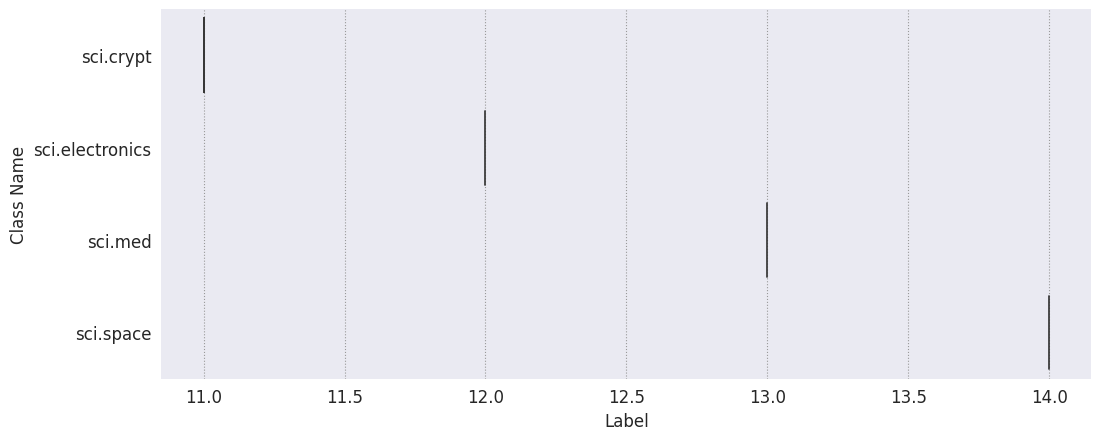

In [46]:
# @title Class Name vs Label

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_outliers['Class Name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_outliers, x='Label', y='Class Name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [53]:
import requests
from bs4 import BeautifulSoup
import numpy as np

def crawl_and_implement_pca(url):
    """Crawls a website, extracts content related to PCA, and implements PCA.

    Args:
        url: The URL of the website to crawl.

    Returns:
        A NumPy array containing the principal components.
    """

    # Crawl the website and extract content
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")

    # Find the relevant content (e.g., using CSS selectors)
    pca_content = soup.find_all("p")  # Example: Find all paragraphs

    # Extract text from the content
    text_content = " ".join([p.get_text() for p in pca_content])

    # Preprocess the text (e.g., remove stop words, punctuation)
    # ... (Implementation for text preprocessing)

    # Implement PCA using NumPy
    # Assume you have a data matrix 'X'
    X = np.array([[1, 2], [3, 4], [5, 6]])  # Example data

    # Center the data
    X_centered = X - np.mean(X, axis=0)

    # Calculate the covariance matrix
    covariance_matrix = np.cov(X_centered.T)

    # Perform eigenvalue decomposition
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

    # Sort eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # Select the top k principal components
    k = 2  # Example: Select the top 2 components
    principal_components = eigenvectors[:, :k]

    return principal_components

# Example usage
url = "https://en.wikipedia.org/wiki/Principal_component_analysis"
principal_components = crawl_and_implement_pca(url)

# Print the principal components
print(principal_components)

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [47]:
# Use the index to map the outlier points back to the projected TSNE points
outliers_projected = df_tsne.loc[df_outliers["Outlier"].index]

Plot the outliers and denote them using a transparent red color.

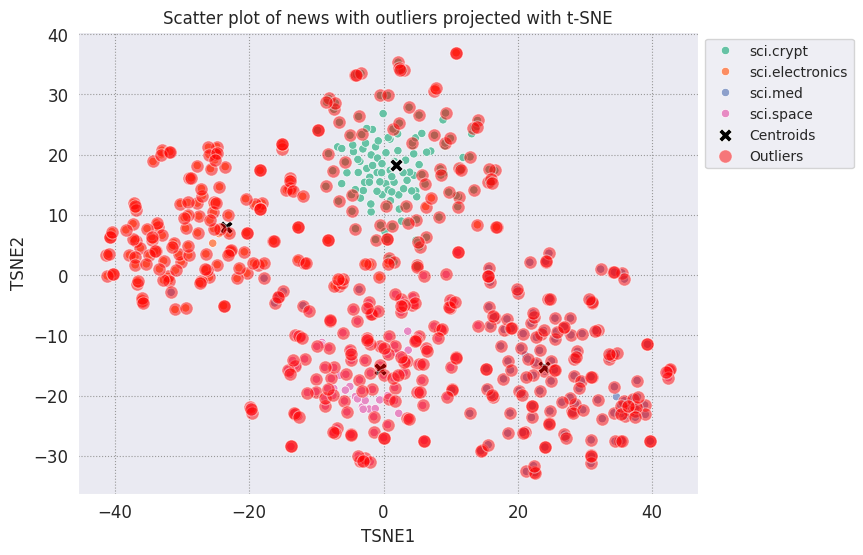

In [48]:
fig, ax = plt.subplots(figsize=(8, 6))  # Set figsize
plt.rcParams.update({"font.size": 10})
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.scatterplot(data=df_tsne, x="TSNE1", y="TSNE2", hue="Class Name", palette="Set2")
sns.scatterplot(
    data=centroids,
    x="TSNE1",
    y="TSNE2",
    color="black",
    marker="X",
    s=100,
    label="Centroids",
)
# Draw a red circle around the outliers
sns.scatterplot(
    data=outliers_projected,
    x="TSNE1",
    y="TSNE2",
    color="red",
    marker="o",
    alpha=0.5,
    s=90,
    label="Outliers",
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title("Scatter plot of news with outliers projected with t-SNE")
plt.xlabel("TSNE1")
plt.ylabel("TSNE2");

Use the index values of the datafames to print a few examples of what outliers can look like in each category. Here, the first data point from each category is printed out. Explore other points in each category to see data that are deemed as outliers, or anomalies.

In [49]:
sci_crypt_outliers = df_outliers[df_outliers["Class Name"] == "sci.crypt"]
print(sci_crypt_outliers["Text"].iloc[0])

 Re: The battle is joined
Organization: Harvey Mudd College, Claremont, CA 91711
Lines: 13

In article <>   writes:
>It looks like Dorothy Denning's wrong-headed ideas have gotten to the
>Administration even sooner than we feared.

I'd lay long odds that it was the other way around.  Clinton didn't
just pull this plan out of any bodily orifices; the NSA has to have
been working on it for years.  While it's possible that Denning  just happened to start arguing for such a
system, it seems more likely that there was a suggestion involved.
If this guess is wrong, I apologize.

	 PGP 2 key by finger or e-mail
   Eli   



In [50]:
sci_elec_outliers = df_outliers[df_outliers["Class Name"] == "sci.electronics"]
print(sci_elec_outliers["Text"].iloc[0])

 Characterization of opamps
Organization: Interkantonales Technikum Rapperswil  Switzerland
Lines: 23

Hi,

Right now I should do some characterization of opamps. Because I don't  
have
special equipment for this task, I have to do this job with relativly  
simple
equipments . 
Does anyone know good test circuitry for characterization of opamps? 
Especially for measuring open-loop gain, phase margin, PSSR, CMMR and so  
on.
Are there any books or application notes on this subject available?

Please reply vi e-mail or nn.

Thanks
Mark

__________________________________________________________________________ 
_____
Mark Niederberger
E-mail: 
__________________________________________________________________________ 
_____



In [51]:
sci_med_outliers = df_outliers[df_outliers["Class Name"] == "sci.med"]
print(sci_med_outliers["Text"].iloc[0])

 Re: Is MSG sensitivity superstition?
Organization: Trusted Information Systems, Inc.
Lines: 30
NNTP-Posting-Host: sol.tis.com

>  writes:
>
>>Is there such a thing as MSG  sensitivity?
>>I saw in the NY Times Sunday that scientists have testified before 
>>an FDA advisory panel that complaints about MSG sensitivity are
>>superstition. Anybody here have experience to the contrary? 
>
>>I'm old enough to remember that the issue has come up at least
>>a couple of times since the 1960s. Then it was called the
>>"Chinese restaurant syndrome" because Chinese cuisine has
>>always used it.
>

	My blood pressure soars, my heart pounds, and I can't get to sleep
for the life of me... feels about like I just drank 8 cups of coffee.

	I avoid it, and beet sugar, flavor enhancers, beet powder, and
whatever other names it may go under. Basicaly I read the ingredients, and
if I don't know what they all are, I don't buy the product.

	MSG sensitivity is definately *real*.



-----------------------Rel

In [52]:
sci_space_outliers = df_outliers[df_outliers["Class Name"] == "sci.space"]
print(sci_space_outliers["Text"].iloc[0])

 Re: Keeping Spacecraft on after Funding Cuts.
News-Software: VAX/VMS VNEWS 1.4-b1  
Organization: Goddard Space Flight Center - Robotics Lab
Lines: 34

In article <>,   writes...
>In article <>,   writes...
>>Why do spacecraft have to be shut off after funding cuts.  For
>>example, Why couldn't Magellan just be told to go into a "safe"
>>mode and stay bobbing about Venus in a low-power-use mode and if
>>maybe in a few years if funding gets restored after the economy
>>gets better , it could be turned on again.  
> 
>It can be, but the problem is a political one, not a technical one.

Also remember that every dollar spent keeping one spacecraft in safe mode
 is a dollar not
spent on mission analysis for a newer spacecraft.  In order to turn the
spacecraft back on, you either need to insure that the Ops guys will be
available, or you need to retrain a new team.

Having said that, there are some spacecraft that do what you have proposed.
Many of the operational satellites Goddard flies  

## Next steps

You've now created an anomaly detector using embeddings! Try using your own textual data to visualize them as embeddings, and choose some bound such that you can detect outliers. You can perform dimensionality reduction in order to complete the visualization step. Note that t-SNE is good at clustering inputs, but can take a longer time to converge or might get stuck at local minima. If you run into this issue, another technique you could consider are [principal components analysis (PCA)](https://en.wikipedia.org/wiki/Principal_component_analysis).